#### This notebook is used to demonstrate the calculation of GM Similarity and GM Loss. 

In [1]:
%run GM_Calculation.ipynb 

GPU available = False


In [2]:
import matplotlib.pyplot as plt

In [6]:
numStreams=6
testfolder= '../samples'
import os
input_imgs = []
listdir = os.listdir(testfolder)
for filename in listdir:
    input_imgs.append(testfolder+'/'+filename)

input_imgs.sort()
print(input_imgs)

['../samples/DSApplause--numClappers_exp-00.00--c-00.wav', '../samples/DSApplause--numClappers_exp-00.10--c-00.wav', '../samples/DSApplause--numClappers_exp-00.20--c-00.wav', '../samples/DSApplause--numClappers_exp-00.30--c-00.wav', '../samples/DSApplause--numClappers_exp-00.40--c-00.wav', '../samples/DSApplause--numClappers_exp-00.50--c-00.wav', '../samples/DSApplause--numClappers_exp-00.60--c-00.wav', '../samples/DSApplause--numClappers_exp-00.70--c-00.wav', '../samples/DSApplause--numClappers_exp-00.80--c-00.wav', '../samples/DSApplause--numClappers_exp-00.90--c-00.wav', '../samples/DSApplause--numClappers_exp-01.00--c-00.wav']


#### Gram-Matrix Cosine Distance Metric (GMcos)

In [7]:
loss_2=np.zeros((11,1))
gram_list=[] 

for i in range(len(input_imgs)):
    input_img=prepare_input(input_imgs[i])
    result=[]
    for j in range(numStreams):
        temp=get_gram_v2(cnnlist[j],result,input_img, None, 1, 0)
    gram_list.append(result)

for i in range(len(gram_list)):
    loss_2[i]=compute_cos_distance(gram_list[0],gram_list[i])

Text(0.5, 1.0, 'GMcos')

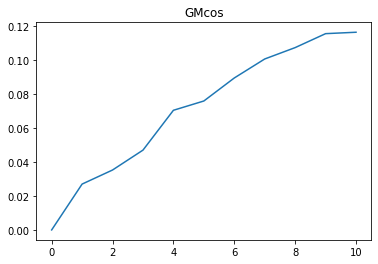

In [8]:
plt.plot(loss_2)
plt.title("GMcos")

#### Gram-Matrix Metric (GM)

In [9]:
loss_3=np.zeros((11,1))
gram_list=[] 

for i in range(len(input_imgs)):
    input_img=prepare_input(input_imgs[i])
    result=[]
    for j in range(numStreams):
        temp=get_gram(cnnlist[j],result,input_img, None, 1, 0)
    gram_list.append(result)


for i in range(len(gram_list)):
    loss_3[i]= compute_mse_distance(gram_list[0],gram_list[i])

Text(0.5, 1.0, 'GM')

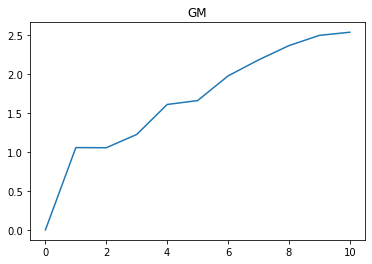

In [10]:
plt.plot(loss_3)
plt.title("GM")